**Import Libraries**

In [179]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

**Upload dataset & data observation**

In [180]:
# Data loading
from google.colab import files
uploaded = files.upload()

Saving mammographic_masses.data.txt to mammographic_masses.data (4).txt


In [181]:
#read cvs file into dataframe
df = pd.read_csv('mammographic_masses.data.txt')
df.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [182]:
 #Add features/colomn names
 #observe missing values
df = pd.read_csv('mammographic_masses.data.txt',names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'],na_values=['?'])
df.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [183]:
# Data Observation for pre-processing
df.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


**Data Pre-processing**

In [184]:
#To drop missing data, check the corelation to avoid data bais.
df.loc[(df['age'].isnull()) |
              (df['shape'].isnull()) |
              (df['margin'].isnull()) |
              (df['density'].isnull()) |
              (df['severity'].isnull())]

,BI-RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


As the missing data seems randomly distributed, so we dropped instances with missing data.

In [185]:
#Drop Missing data rows/instances

df.dropna(inplace=True)
df.describe()

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [186]:
# Separate the terget value/Classes from the Features
Y = df['severity']
Y

0      1
2      1
3      0
8      1
10     1
      ..
956    0
957    1
958    0
959    1
960    0
Name: severity, Length: 830, dtype: int64

In the dataset, "BI-RADS" indicates how confident the severity classification. It is not a features and it will be discarded while "severity" is the terget or classification value. So, we will work with other available features.

In [187]:
# Remove unnessary data and Separate the Features from the terget value 
df= df.drop(['BI-RADS','severity'], 1)
df

<ipython-input-187-b6848fa7d603>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df= df.drop(['BI-RADS','severity'], 1)


,age,shape,margin,density
0,67.0,3.0,5.0,3.0
2,58.0,4.0,5.0,3.0
3,28.0,1.0,1.0,3.0
8,57.0,1.0,5.0,3.0
10,76.0,1.0,4.0,3.0
...,...,...,...,...
956,47.0,2.0,1.0,3.0
957,56.0,4.0,5.0,3.0
958,64.0,4.0,5.0,3.0
959,66.0,4.0,5.0,3.0


In [188]:
#Convert features Pandas dataframe into numpy.
np_feature = df[['age', 'shape',
        'margin', 'density']].values

feature_names = ['age', 'shape', 'margin', 'density']
np_feature

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [189]:
#Data standardization by standardScaler

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(np_feature)
X

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

**Data visualization**

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

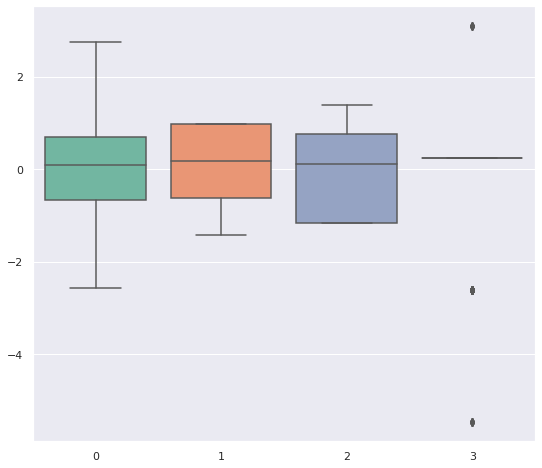

In [190]:
# Box plot
plt.rcParams['figure.figsize'] = [9, 8]

ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

**Training Pre-processing(Test & train Split)**

In [191]:
numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(X, Y, train_size=0.75, random_state=1)

**Logistic Regression**

In [192]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, X, Y, cv=10)
cv_scores.mean()

0.8072289156626505

**Decision Trees**

In [193]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=4)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)


DecisionTreeClassifier(random_state=4)

Display the result of decision tree.

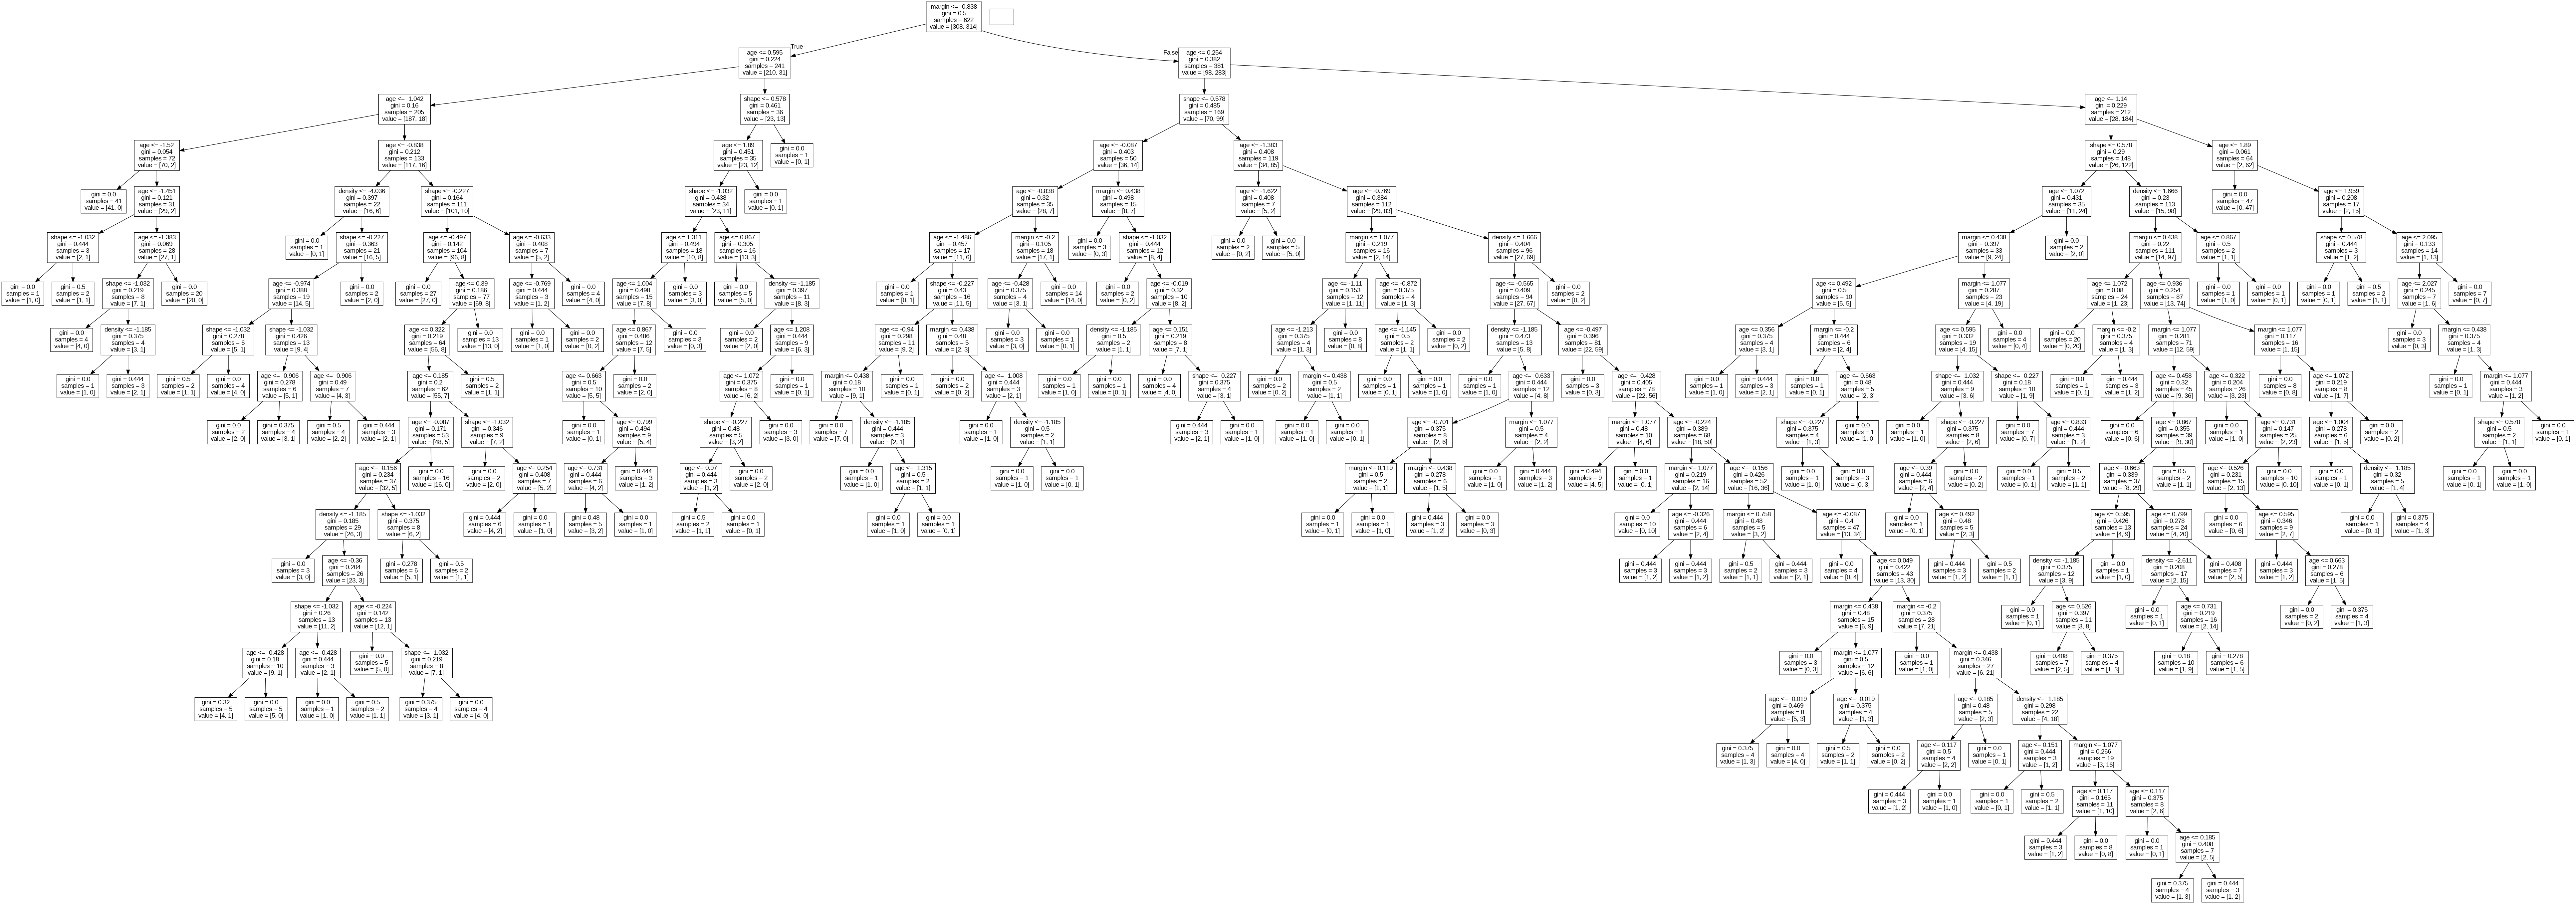

In [194]:
#import necessary libraries
from IPython.display import Image  
from six import StringIO
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Accuracy of the resulting decision tree model with test data.

In [195]:
clf.score(testing_inputs, testing_classes)

0.7403846153846154

K-Fold cross validation to get a better measure of model's accuracy (K=10)

In [196]:
clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, X, Y, cv=10)

cv_scores.mean()

0.7373493975903613

**RandomForestClassifier**

In [197]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, X, Y, cv=10)

cv_scores.mean()

0.7421686746987952

**Support Vector Machine-SVM**

Next try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [198]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [199]:
cv_scores = cross_val_score(svc, X, Y, cv=10)

cv_scores.mean()

0.7975903614457832

**K-Nearest Neighbor-KNN**

In [200]:
#For KNN, considered K=10
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, X, Y, cv=10)

cv_scores.mean()

0.7927710843373494

Try KNN new value to K=50

In [201]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    print (n, cv_scores.mean())

1 0.7216867469879519
2 0.689156626506024
3 0.7566265060240964
4 0.7337349397590361
5 0.7746987951807228
6 0.7698795180722892
7 0.7987951807228916
8 0.7746987951807229
9 0.7891566265060241
10 0.7927710843373494
11 0.7915662650602411
12 0.7819277108433735
13 0.7891566265060241
14 0.7879518072289157
15 0.7855421686746988
16 0.7807228915662651
17 0.7783132530120482
18 0.7795180722891566
19 0.7843373493975904
20 0.7843373493975904
21 0.7879518072289156
22 0.7843373493975904
23 0.7795180722891566
24 0.7783132530120482
25 0.7831325301204819
26 0.7855421686746988
27 0.7855421686746988
28 0.789156626506024
29 0.7867469879518072
30 0.791566265060241
31 0.7879518072289157
32 0.7903614457831325
33 0.7903614457831325
34 0.7843373493975903
35 0.7855421686746987
36 0.7879518072289156
37 0.7831325301204819
38 0.7867469879518072
39 0.7831325301204819
40 0.7831325301204819
41 0.780722891566265
42 0.7831325301204819
43 0.7819277108433734
44 0.7819277108433734
45 0.7831325301204819
46 0.7843373493975904
4

**Naive Bayes**

In [202]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
X_minmax = scaler.fit_transform(X)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, X_minmax, Y, cv=10)

cv_scores.mean()

0.7855421686746988

**Neural Networks**

In [203]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    #4 feature inputs going into an 5-unit layer
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    # Add some hidden-layer to try - Deep learning
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model with adam optimizer 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [204]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# An estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=50, verbose=0)
# scikit_learn's cross_val_score to evaluate model
cv_scores = cross_val_score(estimator, X, Y, cv=10)
cv_scores.mean()


<ipython-input-204-9a6a58035ac8>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_model, epochs=50, verbose=0)


0.8060240983963013

Thank you for your attention to my work.